In [1]:
# Cargar el conjunto de datos en un DataFrame de Pandas y explorar las primeras filas para familiarizarse con la estructura de los datos:

import pandas as pd

# Cargar datos
df = pd.read_csv('D:/Documents/Bootcamp/Amazon/amz_uk_price_prediction_dataset.csv')

# Ver las primeras filas
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [2]:
# Crear una tabla cruzada entre category y isBestSeller:

crosstab = pd.crosstab(df['category'], df['isBestSeller'])
print(crosstab)


isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]


In [4]:
# Check the columns after the calculation
print("Columns after calculation:", crosstab.columns)


Columns after calculation: Index(['False', 'True'], dtype='object', name='isBestSeller')


In [5]:
print(crosstab.head())  # Print a sample to see if the new column exists


isBestSeller                   False  True
category                                  
3D Printers                      247     1
3D Printing & Scanning          4065     2
Abrasive & Finishing Products    245     5
Action Cameras                  1696     1
Adapters                         251     3


In [6]:
# Example DataFrame for demonstration purposes
import pandas as pd

# Sample DataFrame
crosstab = pd.DataFrame({
    '0': [10, 20, 30],
    '1': [5, 15, 25]
})

# Calculate the proportion
crosstab['proportion_best_seller'] = crosstab['1'] / (crosstab['0'] + crosstab['1'])

# Check if the column is created
print(crosstab.head())

# Sort by the new column
crosstab_sorted = crosstab.sort_values('proportion_best_seller', ascending=False)
print(crosstab_sorted)


    0   1  proportion_best_seller
0  10   5                0.333333
1  20  15                0.428571
2  30  25                0.454545
    0   1  proportion_best_seller
2  30  25                0.454545
1  20  15                0.428571
0  10   5                0.333333


In [7]:
# Strip any leading/trailing spaces from column names
crosstab.columns = crosstab.columns.str.strip()


In [8]:
try:
    crosstab['proportion_best_seller'] = crosstab['1'] / (crosstab['0'] + crosstab['1'])
    crosstab_sorted = crosstab.sort_values('proportion_best_seller', ascending=False)
    print(crosstab_sorted)
except KeyError as e:
    print(f"KeyError: {e}")
    print("Available columns:", crosstab.columns)


    0   1  proportion_best_seller
2  30  25                0.454545
1  20  15                0.428571
0  10   5                0.333333


In [10]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])
print(f"Chi-cuadrado: {chi2}, p-valor: {p}")


Chi-cuadrado: 0.7070707070707071, p-valor: 0.7022011668554531


In [11]:
import numpy as np

cramer_v = np.sqrt(chi2 / (len(df) * (min(crosstab.shape) - 1)))
print(f"Valor de Cramér: {cramer_v}")


Valor de Cramér: 0.00038036174805387764


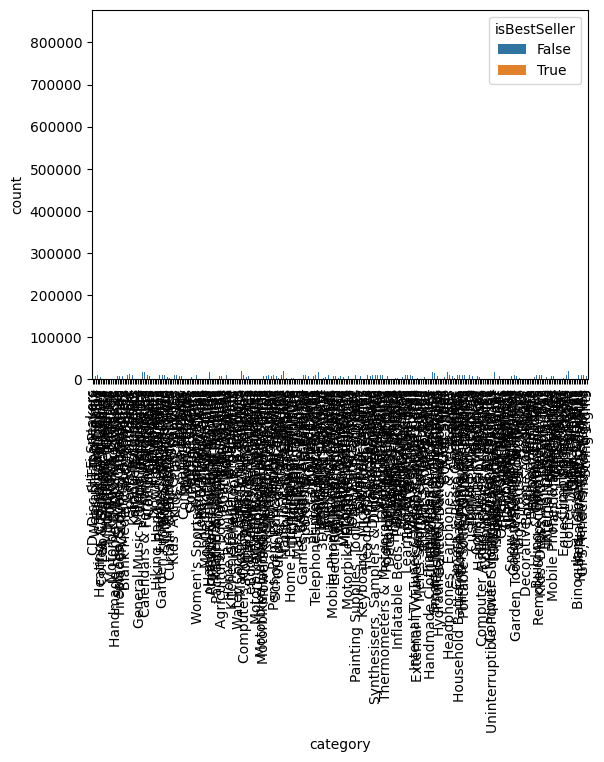

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='category', hue='isBestSeller', data=df)
plt.xticks(rotation=90)
plt.show()


In [13]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Limites de precios
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el dataframe sin outliers
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


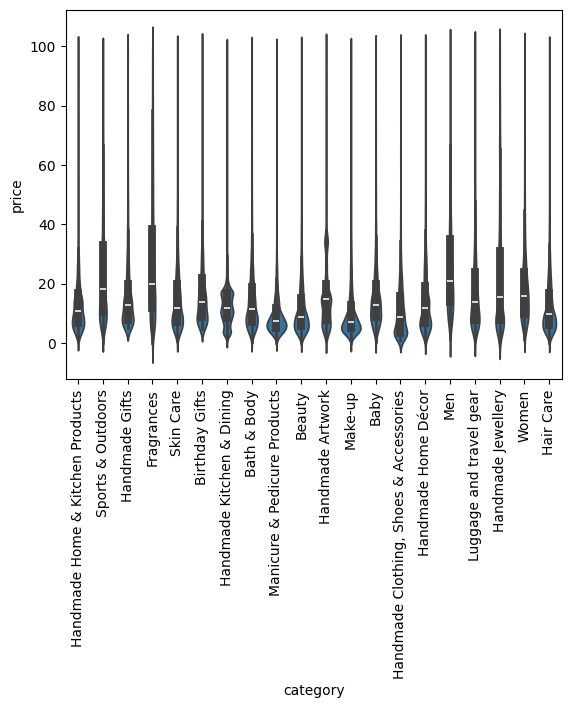

In [14]:
top_20_categories = df_clean['category'].value_counts().nlargest(20).index
sns.violinplot(x='category', y='price', data=df_clean[df_clean['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.show()


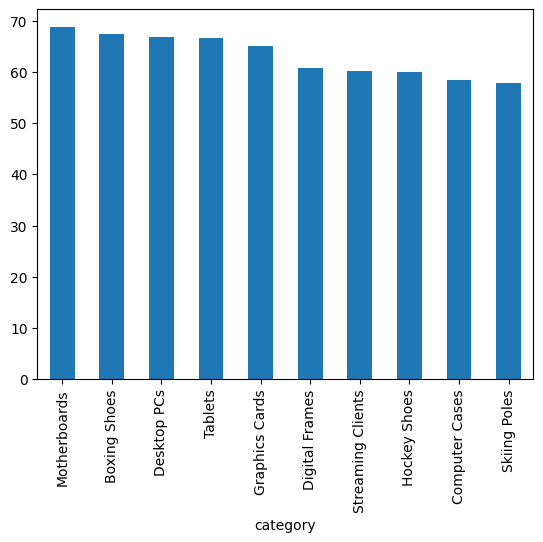

In [15]:
avg_price_by_category = df_clean.groupby('category')['price'].mean().nlargest(10)
avg_price_by_category.plot(kind='bar')
plt.show()


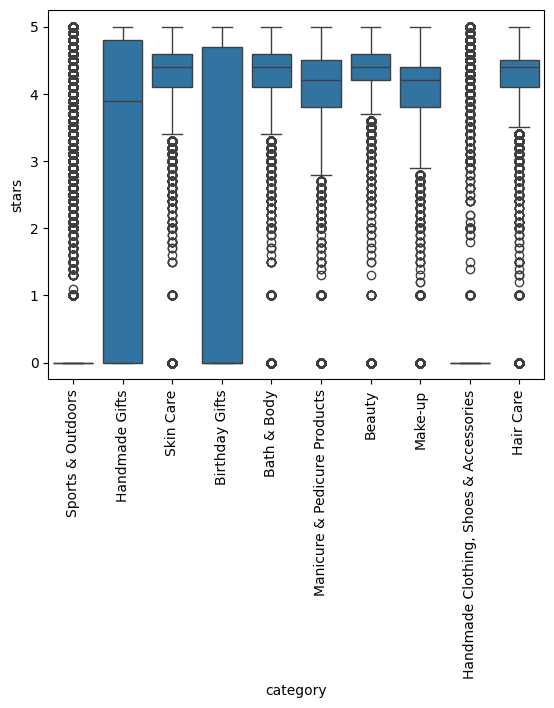

In [16]:
top_10_categories = df_clean['category'].value_counts().nlargest(10).index
sns.boxplot(x='category', y='stars', data=df_clean[df_clean['category'].isin(top_10_categories)])
plt.xticks(rotation=90)
plt.show()


In [17]:
correlation = df_clean['price'].corr(df_clean['stars'])
print(f"Correlación entre precio y calificaciones: {correlation}")


Correlación entre precio y calificaciones: -0.07767299878181444


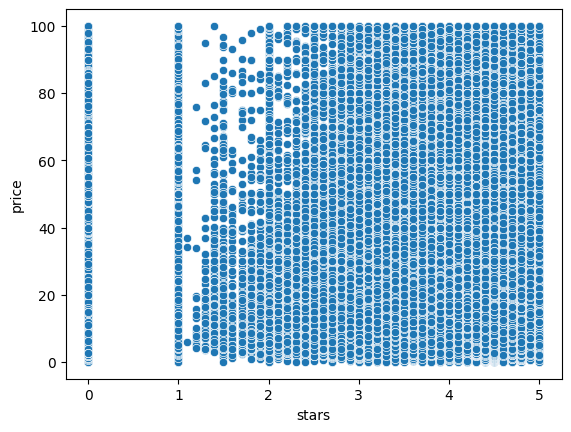

In [18]:
sns.scatterplot(x='stars', y='price', data=df_clean)
plt.show()


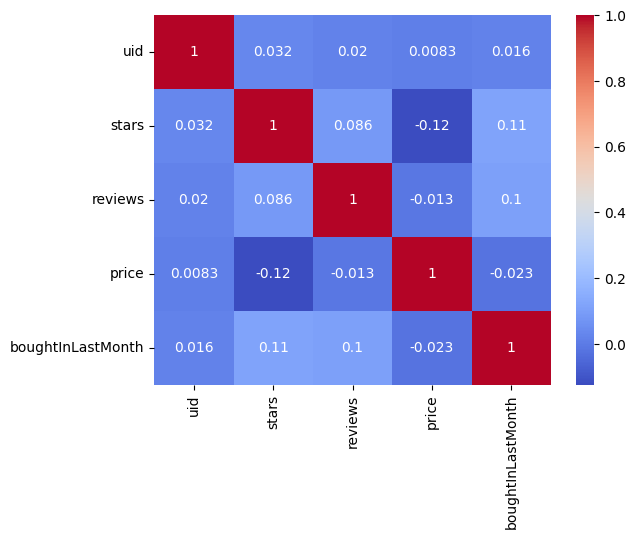

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('D:/Documents/Bootcamp/Amazon/amz_uk_price_prediction_dataset.csv')

# Eliminar outliers (opcional, si ya lo has hecho)
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


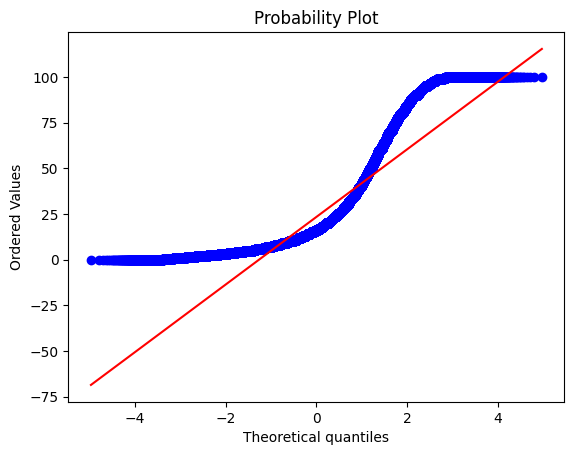

In [22]:
from scipy import stats

stats.probplot(df_clean['price'], dist="norm", plot=plt)
plt.show()
